In [42]:
import pandas as pd
import numpy as np

In [43]:
df = pd.read_csv('train.csv')

In [44]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [45]:
X = df[['GrLivArea', 'BedroomAbvGr', 'FullBath']]
y = df['SalePrice']

In [46]:
X

,GrLivArea,BedroomAbvGr,FullBath
0,1710,3,2
1,1262,3,2
2,1786,3,2
3,1717,3,1
4,2198,4,2
...,...,...,...
1455,1647,3,2
1456,2073,3,2
1457,2340,4,2
1458,1078,2,1


In [47]:
y

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

In [48]:
X = X.fillna(X.mean())

In [49]:
X

,GrLivArea,BedroomAbvGr,FullBath
0,1710,3,2
1,1262,3,2
2,1786,3,2
3,1717,3,1
4,2198,4,2
...,...,...,...
1455,1647,3,2
1456,2073,3,2
1457,2340,4,2
1458,1078,2,1


In [50]:
X.isnull().sum()

GrLivArea       0
BedroomAbvGr    0
FullBath        0
dtype: int64

In [51]:
from sklearn.model_selection import train_test_split

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [53]:
from sklearn.linear_model import LinearRegression

In [54]:
model = LinearRegression()

In [55]:
model.fit(X_train, y_train)

LinearRegression()

In [57]:
# make prediction
y_pred = model.predict(X_test)
print(y_pred[:5])


[113410.67255298 305081.87775899 135904.78562983 205424.67564124
 227502.68349004]


In [58]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("MSE:", mse)
print("R2 Score:", r2)


MSE: 2806426667.247852
R2 Score: 0.6341189942328374


In [59]:
import joblib

joblib.dump(model, "linear_regression_model.pkl")
print("model loaded successfully")


model loaded successfully


In [60]:
import pandas as pd

input_data = pd.DataFrame(
    [[4000, 3, 2]],
    columns=['GrLivArea', 'BedroomAbvGr', 'FullBath']
)

prediction = model.predict(input_data)
print(f"Estimated Price: ₹{int(predicted_price[0]):,}")


Estimated Price: ₹240,377


In [61]:
import matplotlib.pyplot as plt

In [62]:
data = pd.DataFrame({
    "GrLivArea": [1500, 1800, 2500],
    "BedroomAbvGr": [2, 3, 4],
    "FullBath": [1, 2, 3]
}, index=["House A", "House B", "House C"])


In [63]:
predicted_prices = model.predict(data)


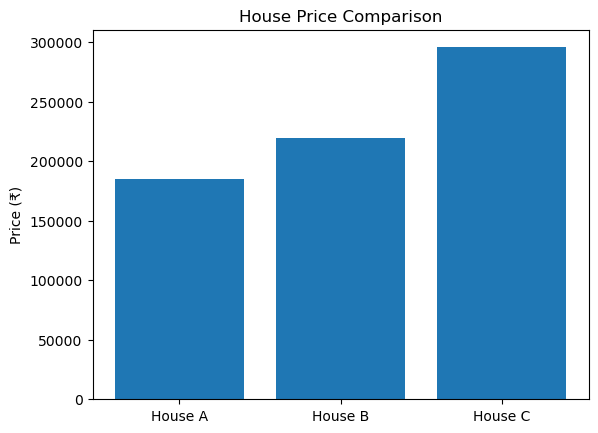

In [64]:
plt.figure()
plt.bar(data.index, predicted_prices)
plt.ylabel("Price (₹)")
plt.title("House Price Comparison")
plt.xticks(rotation=0)
plt.show()
